# Plot.ly Charts

In [40]:
import pickle
from collections import Counter, OrderedDict

# load the pickled files from previous notebook
# primanti_sent = pickle.load(open("aws_backup/primanti_sentiment.pkl", "rb"))
# primanti_dict = pickle.load(open("aws_backup/primanti_dict.pkl", "rb"))
SPizza_sent = pickle.load(open("SPizza_sentiment.pkl", "rb"))
SPizza_dict = pickle.load(open("SPizza_dict.pkl", "rb"))

### Code for getting a table for aspect terms with most positive or most negative sentiment

In [41]:
from collections import defaultdict
lowest = defaultdict()
highest = defaultdict()
for i in SPizza_dict:
    if SPizza_dict[i]:
        highest[i] = SPizza_dict[i].most_common()[:20]
        lowest[i] = SPizza_dict[i].most_common()[-10:]

In [42]:
import pandas as pd
highest_df = pd.DataFrame(highest)
lowest_df = pd.DataFrame(lowest)

In [43]:
lowest_df = lowest_df.drop(["misc"],1)

In [44]:
highest_df = highest_df.drop(["misc"],1)

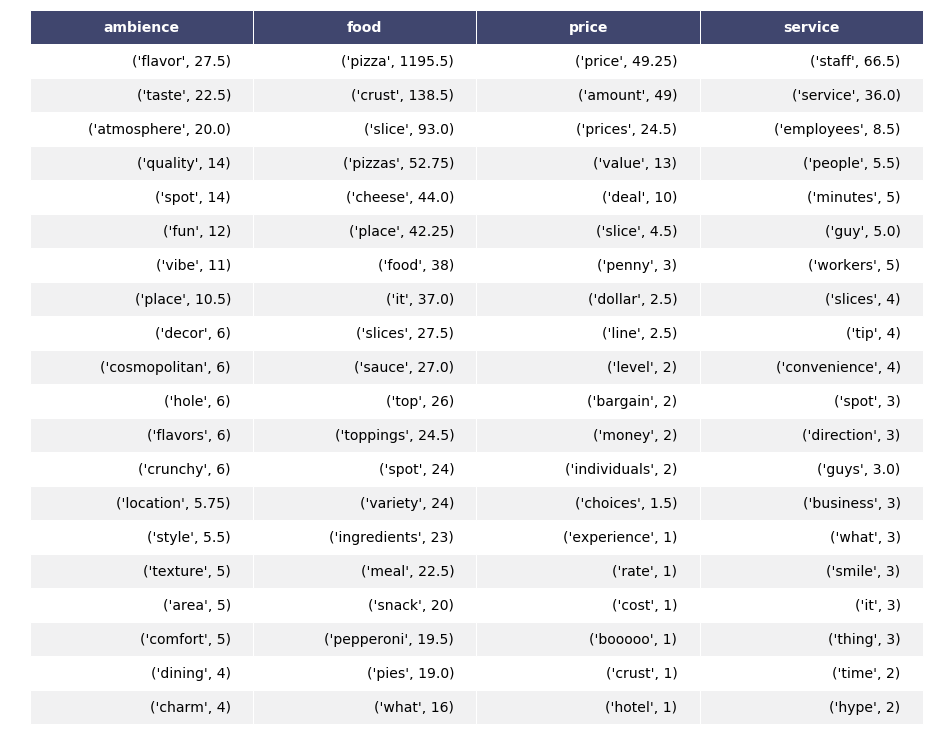

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(highest_df, header_columns=0, col_width=4.0)


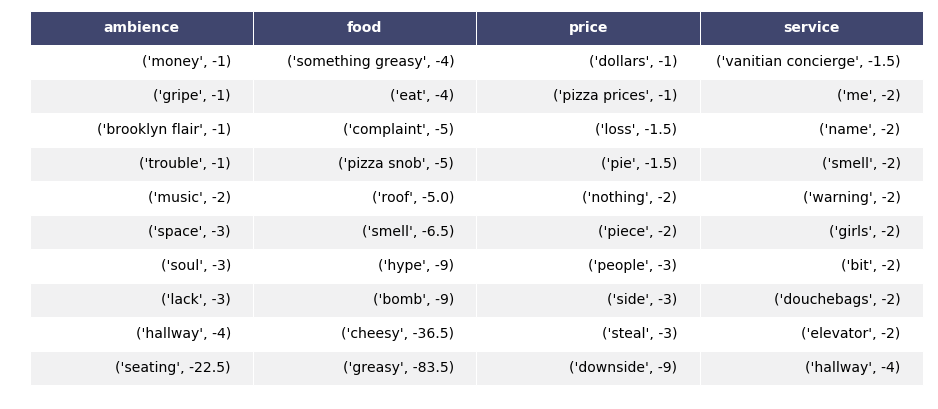

In [46]:
render_mpl_table(lowest_df, header_columns=0, col_width=4.0)

### Code for visualizing reviews per aspect category and pos/neg ratio

In [47]:
# primanti_df = pd.DataFrame(primanti_sent).T
SPizza_df = pd.DataFrame(SPizza_sent).T
SPizza_df

,neg,pos
ambience,150.0,454.750
food,892.0,3422.125
misc,38.5,66.500
price,101.0,242.250
service,159.0,351.500


In [48]:
# primanti_df["total"] = primanti_df.neg + primanti_df.pos
# primanti_df["neg_norm"] = primanti_df.neg/(primanti_df.neg + primanti_df.pos)
# primanti_df["pos_norm"] = primanti_df.pos/(primanti_df.neg + primanti_df.pos)
SPizza_df["total"] = SPizza_df.neg + SPizza_df.pos
SPizza_df["neg_norm"] = SPizza_df.neg/(SPizza_df.neg + SPizza_df.pos)
SPizza_df["pos_norm"] = SPizza_df.pos/(SPizza_df.neg + SPizza_df.pos)

In [49]:
SPizza_df

,neg,pos,total,neg_norm,pos_norm
ambience,150.0,454.750,604.750,0.248036,0.751964
food,892.0,3422.125,4314.125,0.206763,0.793237
misc,38.5,66.500,105.000,0.366667,0.633333
price,101.0,242.250,343.250,0.294246,0.705754
service,159.0,351.500,510.500,0.311459,0.688541


In [58]:
import plotly
plotly.tools.set_credentials_file(username='...', api_key='...')
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=SPizza_df.index,
    y=SPizza_df.pos_norm,
    name='% Pos Sentiment'
)
trace2 = go.Bar(
    x=SPizza_df.index,
    y=SPizza_df.neg_norm,
    name='% Neg Sentiment'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Percentage of +/- Sentiment of Aspect",
    barmode = 'stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [52]:
# primanti_df["pos/neg"]=primanti_df.pos/primanti_df.neg
SPizza_df["pos/neg"]=SPizza_df.pos/SPizza_df.neg

In [55]:



data = [

    go.Scatterpolar(
      r = SPizza_df["pos/neg"],
      theta = SPizza_df.index,
      fill = 'toself',
      name = 'Secret Pizza',
      textfont = dict(size=18)
    )
]

layout = go.Layout(
    title = "Aspect Comparison",
        titlefont=dict(
            size=20,
            color='#7f7f7f'
        ),
    legend=dict(
        font=dict(
            size=18,
            )
        ),
        
    polar = dict(
        radialaxis = dict(
              visible = True,
              range = [0, 5]
            )
        ),
      showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)#, filename = "radar/multiple")

In [57]:

labels = SPizza_df.index
values = SPizza_df.total

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])